In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.mixture import GaussianMixture

In [6]:
def isBimodal(data):
    # ---------------------------------------------------------
    # 2. 시각화 (KDE Plot + Rug Plot)
    # ---------------------------------------------------------
    plt.figure(figsize=(10, 5))

    # KDE(커널 밀도 추정): 히스토그램보다 부드러운 곡선으로 분포 표현
    sns.kdeplot(data, fill=True, color='skyblue', alpha=0.3, label='KDE (Density)')

    # Rug Plot: 실제 데이터 포인트의 위치를 바닥에 표시 (데이터가 적을 때 매우 유용)
    sns.rugplot(data, color='black', height=0.1, linewidth=2, label='Data Points (Rug)')

    plt.title(f'Distribution Visualization (N={len(data)})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # ---------------------------------------------------------
    # 3. 통계적 지표 계산 (Sarle's Bimodality Coefficient)
    # ---------------------------------------------------------
    # Scipy의 kurtosis는 정규분포=0이 기준(Fisher's definition)이므로
    # 공식에 넣기 위해 정규분포=3이 기준인 Pearson's definition으로 변환 (+3)
    s = skew(data)
    excess_kurt = kurtosis(data)  # Fisher (Normal = 0)
    raw_kurt = excess_kurt + 3    # Pearson (Normal = 3)

    # BC 공식: (Skewness^2 + 1) / Kurtosis
    bimodality_coeff = (s**2 + 1) / raw_kurt

    print(f"--- [1] Sarle's Bimodality Coefficient ---")
    print(f"값: {bimodality_coeff:.4f}")
    print("해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음\n")

    # ---------------------------------------------------------
    # 4. 모델 적합도 비교 (Gaussian Mixture Model - AIC)
    # ---------------------------------------------------------
    # GMM은 2차원 배열 입력을 요구하므로 reshape
    data_reshaped = data.reshape(-1, 1)

    # 컴포넌트(봉우리)가 1개인 모델 vs 2개인 모델 학습
    gmm1 = GaussianMixture(n_components=1, random_state=42).fit(data_reshaped)
    gmm2 = GaussianMixture(n_components=2, random_state=42).fit(data_reshaped)

    # AIC(Akaike Information Criterion) 계산: 낮을수록 더 좋은 모델
    aic1 = gmm1.aic(data_reshaped)
    aic2 = gmm2.aic(data_reshaped)

    print(f"--- [2] AIC 비교 (낮을수록 좋음) ---")
    print(f"1개 분포 가정 (Unimodal): {aic1:.4f}")
    print(f"2개 분포 가정 (Bimodal) : {aic2:.4f}")
    print(f"결론: {'이중 분포(Bimodal) 모델이 더 적합함' if aic2 < aic1 else '단봉 분포(Unimodal) 모델이 더 적합함'}")

In [83]:
results = pd.read_excel('basemodel_results.xlsx', index_col=0)
results.index = pd.PeriodIndex(results.index, freq='Q')

2017Q1


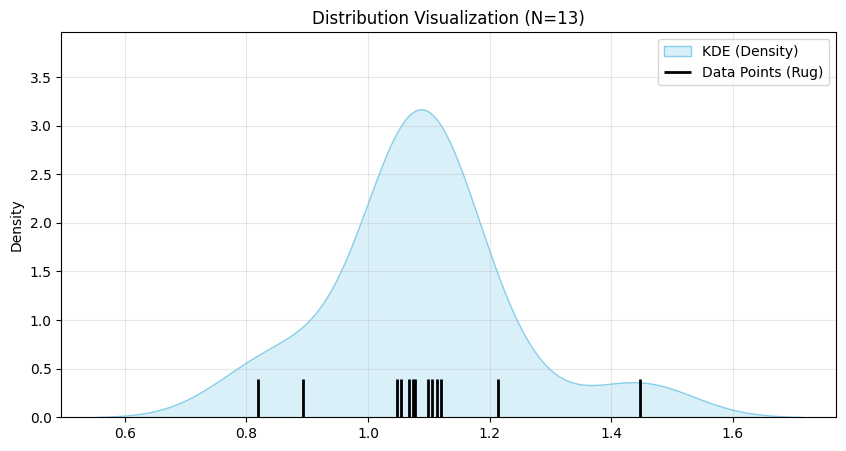

--- [1] Sarle's Bimodality Coefficient ---
값: 0.3002
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): -9.9146
2개 분포 가정 (Bimodal) : -16.1053
결론: 이중 분포(Bimodal) 모델이 더 적합함
2017Q2


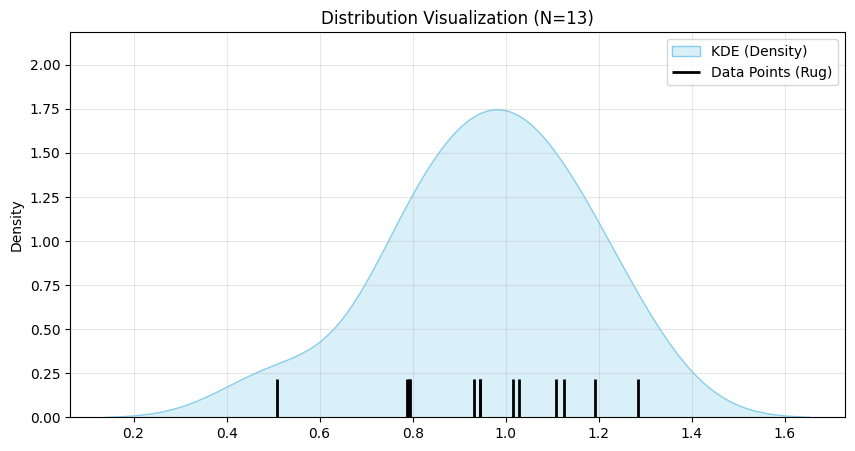

--- [1] Sarle's Bimodality Coefficient ---
값: 0.4165
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): -1.2832
2개 분포 가정 (Bimodal) : 4.2733
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2017Q3


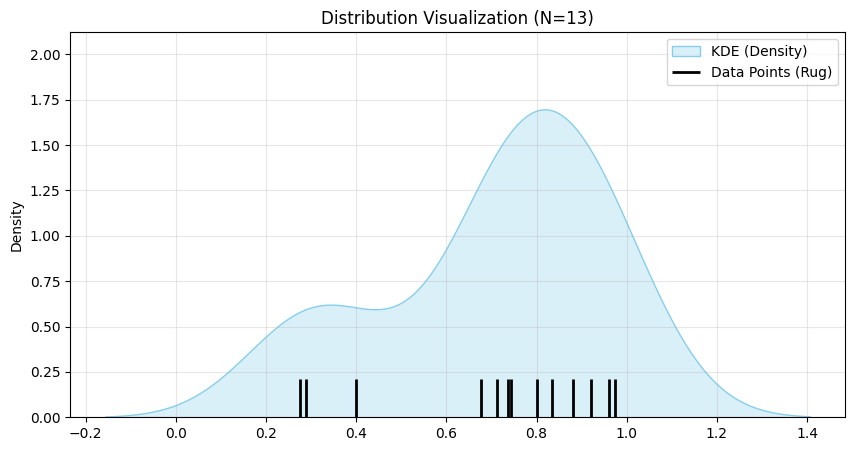

--- [1] Sarle's Bimodality Coefficient ---
값: 0.7112
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 2.8354
2개 분포 가정 (Bimodal) : -2.1993
결론: 이중 분포(Bimodal) 모델이 더 적합함
2017Q4


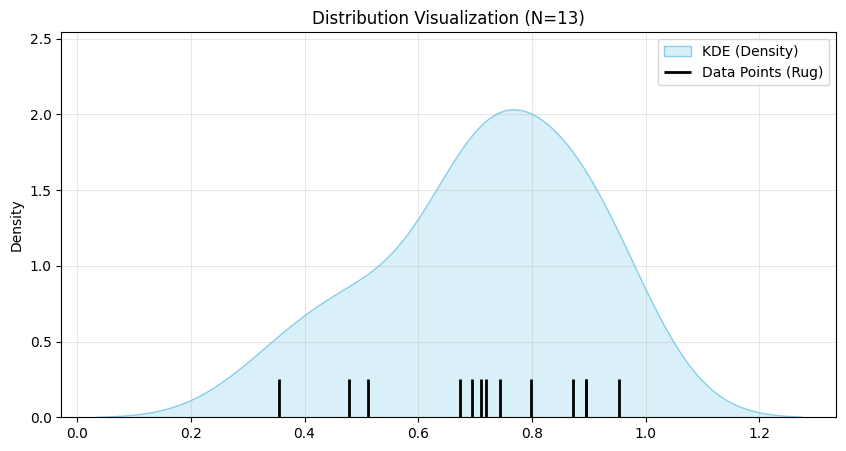

--- [1] Sarle's Bimodality Coefficient ---
값: 0.5531
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): -4.9420
2개 분포 가정 (Bimodal) : -2.3408
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2018Q1


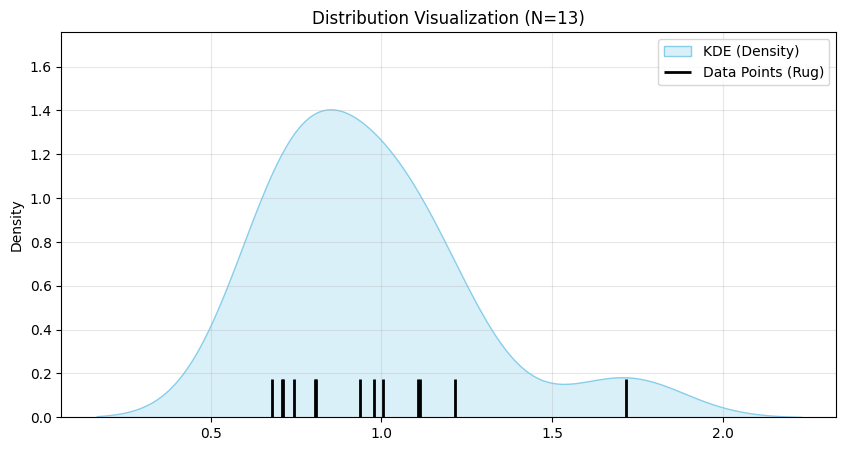

--- [1] Sarle's Bimodality Coefficient ---
값: 0.6311
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 7.3074
2개 분포 가정 (Bimodal) : -2.7025
결론: 이중 분포(Bimodal) 모델이 더 적합함
2018Q2


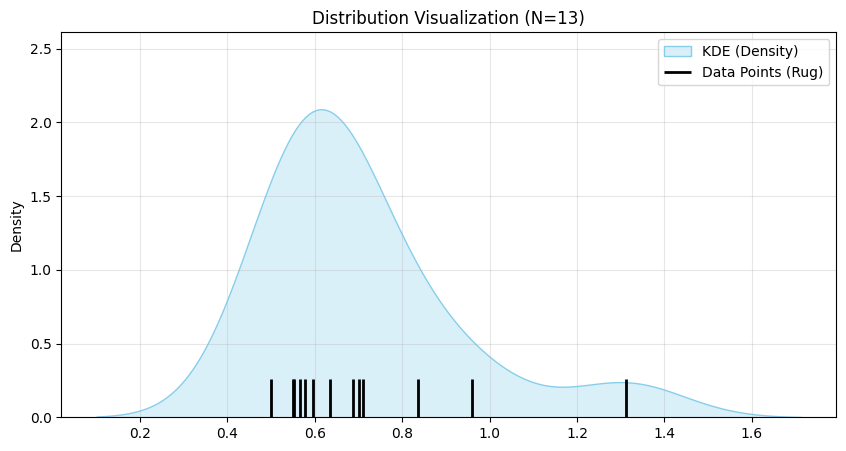

--- [1] Sarle's Bimodality Coefficient ---
값: 0.7488
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 0.7884
2개 분포 가정 (Bimodal) : -3.0606
결론: 이중 분포(Bimodal) 모델이 더 적합함
2018Q3


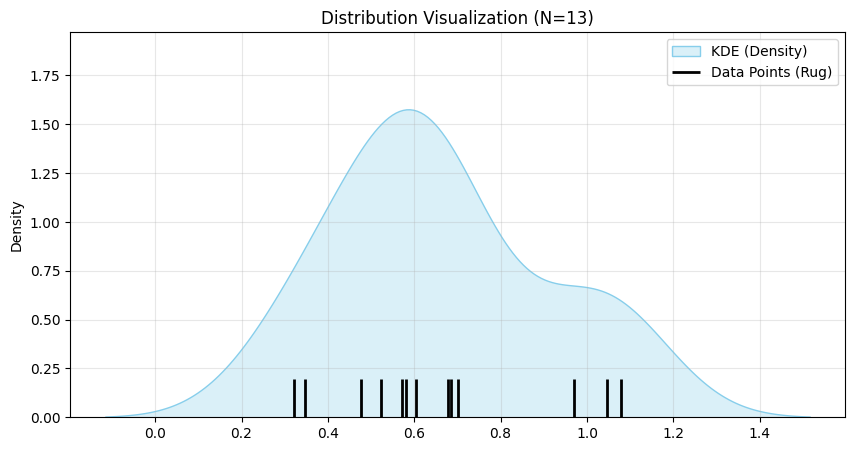

--- [1] Sarle's Bimodality Coefficient ---
값: 0.5491
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 3.0494
2개 분포 가정 (Bimodal) : 1.1590
결론: 이중 분포(Bimodal) 모델이 더 적합함
2018Q4


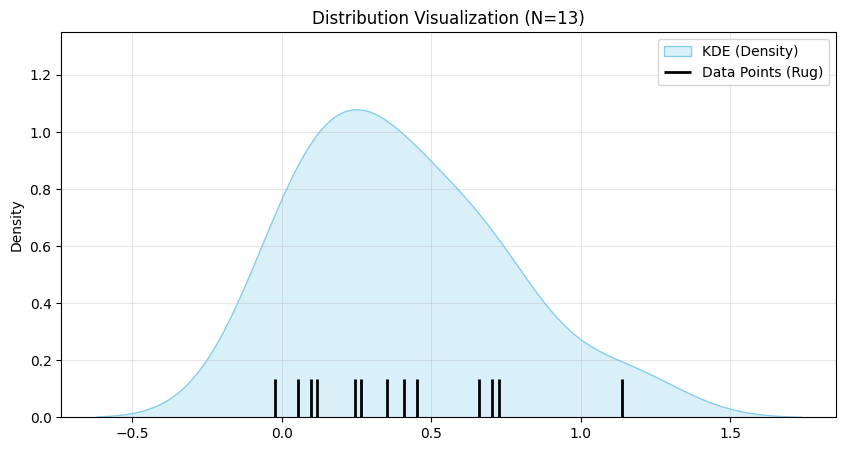

--- [1] Sarle's Bimodality Coefficient ---
값: 0.5425
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 11.2390
2개 분포 가정 (Bimodal) : 14.9762
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2019Q1


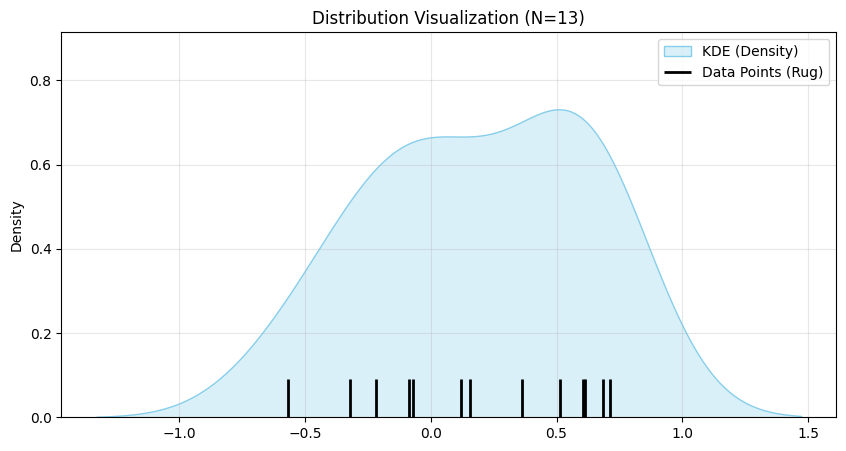

--- [1] Sarle's Bimodality Coefficient ---
값: 0.5952
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 17.5400
2개 분포 가정 (Bimodal) : 16.3463
결론: 이중 분포(Bimodal) 모델이 더 적합함
2019Q2


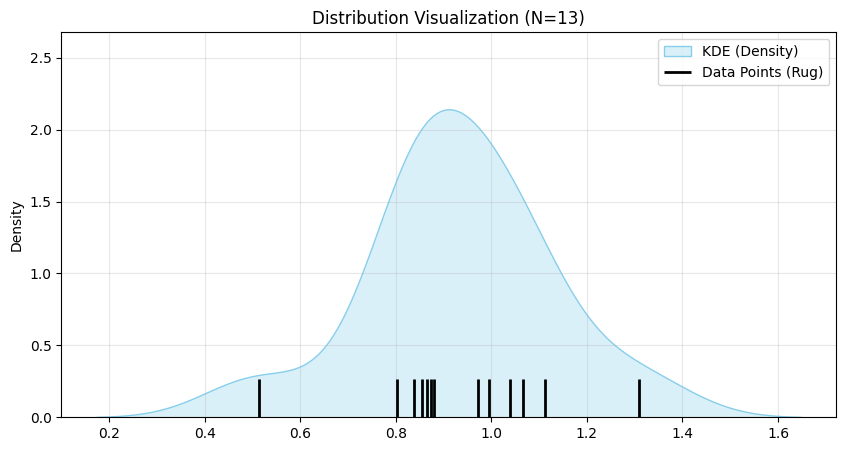

--- [1] Sarle's Bimodality Coefficient ---
값: 0.2753
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): -3.4886
2개 분포 가정 (Bimodal) : -7.9647
결론: 이중 분포(Bimodal) 모델이 더 적합함
2019Q3


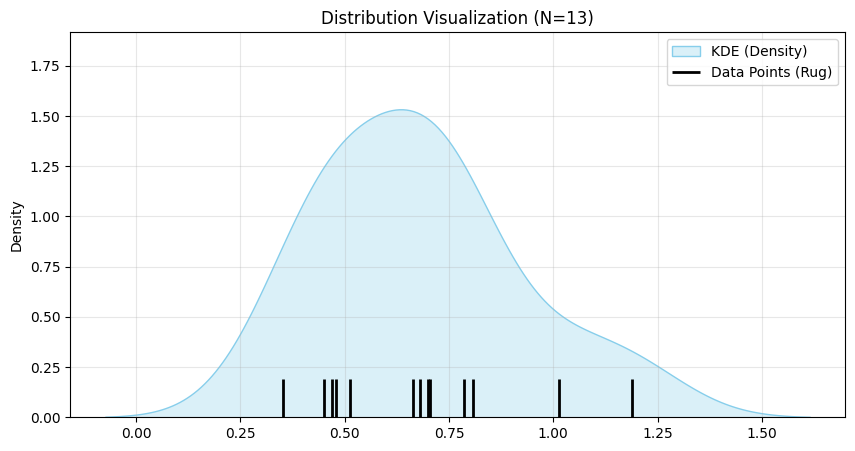

--- [1] Sarle's Bimodality Coefficient ---
값: 0.5221
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 2.4207
2개 분포 가정 (Bimodal) : 5.6991
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2019Q4


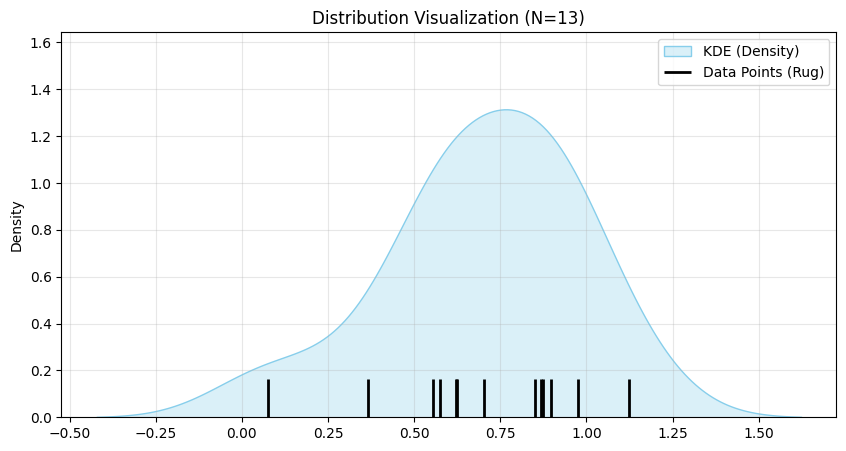

--- [1] Sarle's Bimodality Coefficient ---
값: 0.4679
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 6.5345
2개 분포 가정 (Bimodal) : 11.5151
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2020Q1


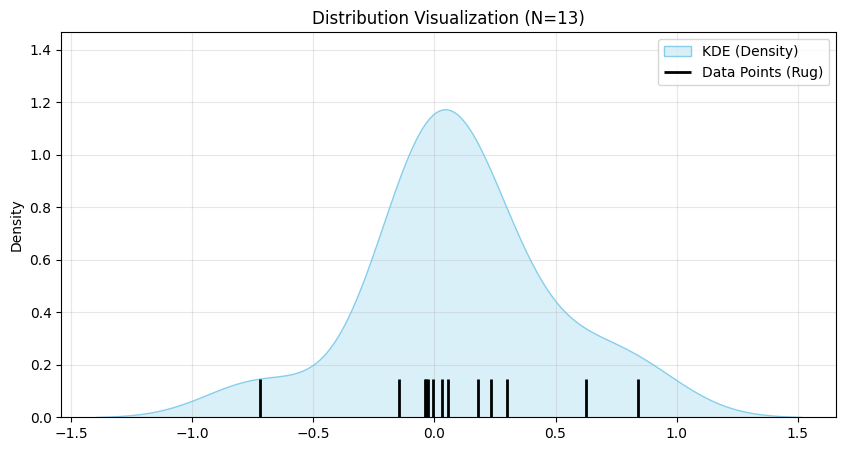

--- [1] Sarle's Bimodality Coefficient ---
값: 0.2636
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 14.3895
2개 분포 가정 (Bimodal) : 20.3353
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2020Q2


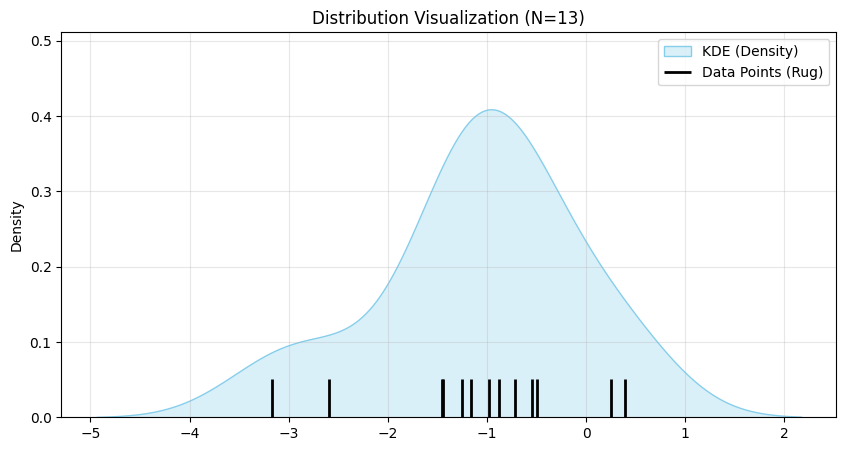

--- [1] Sarle's Bimodality Coefficient ---
값: 0.4444
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 39.5426
2개 분포 가정 (Bimodal) : 41.4993
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2020Q3


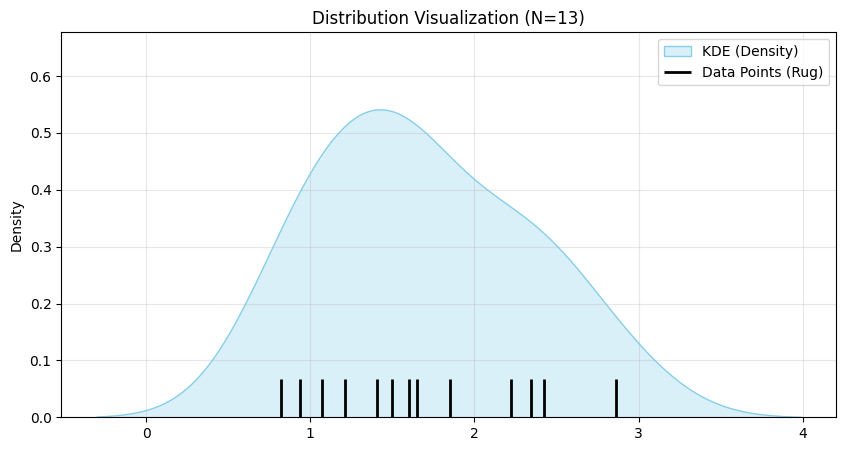

--- [1] Sarle's Bimodality Coefficient ---
값: 0.5453
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 27.6856
2개 분포 가정 (Bimodal) : 31.1359
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2020Q4


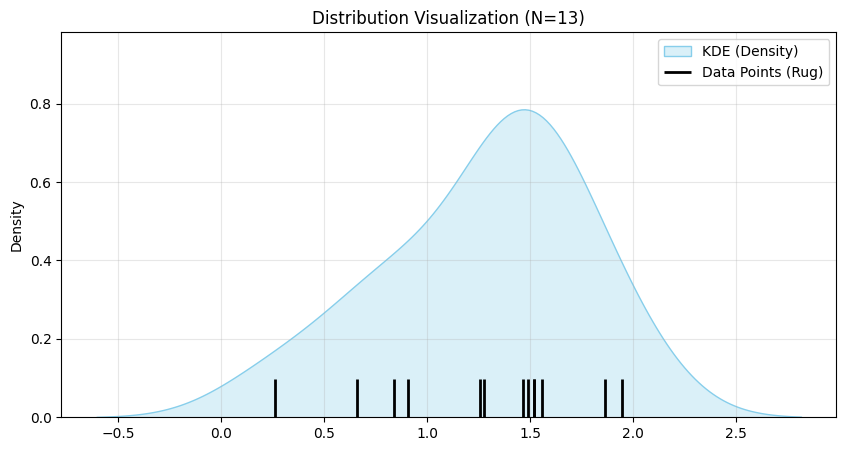

--- [1] Sarle's Bimodality Coefficient ---
값: 0.5346
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 20.9564
2개 분포 가정 (Bimodal) : 23.9775
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2021Q1


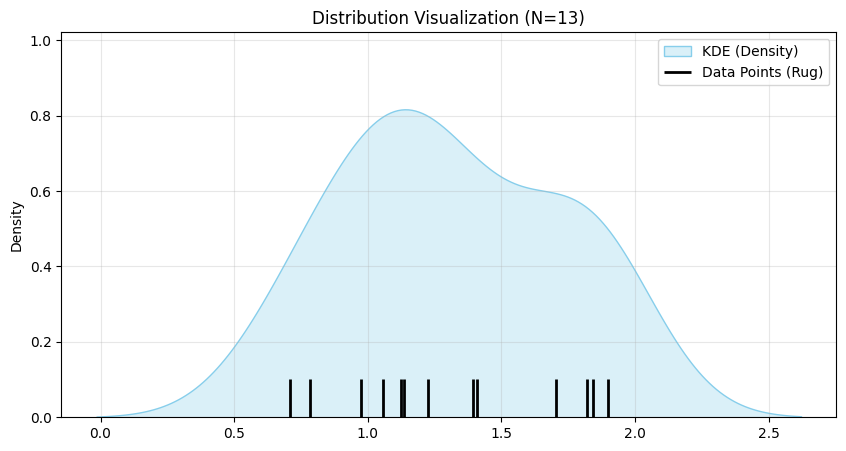

--- [1] Sarle's Bimodality Coefficient ---
값: 0.5746
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 16.2205
2개 분포 가정 (Bimodal) : 14.9936
결론: 이중 분포(Bimodal) 모델이 더 적합함
2021Q2


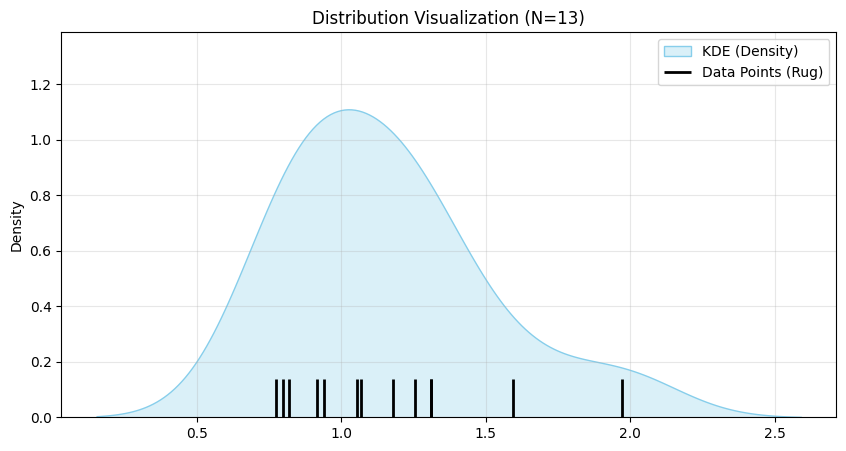

--- [1] Sarle's Bimodality Coefficient ---
값: 0.5883
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 12.1776
2개 분포 가정 (Bimodal) : 14.9091
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2021Q3


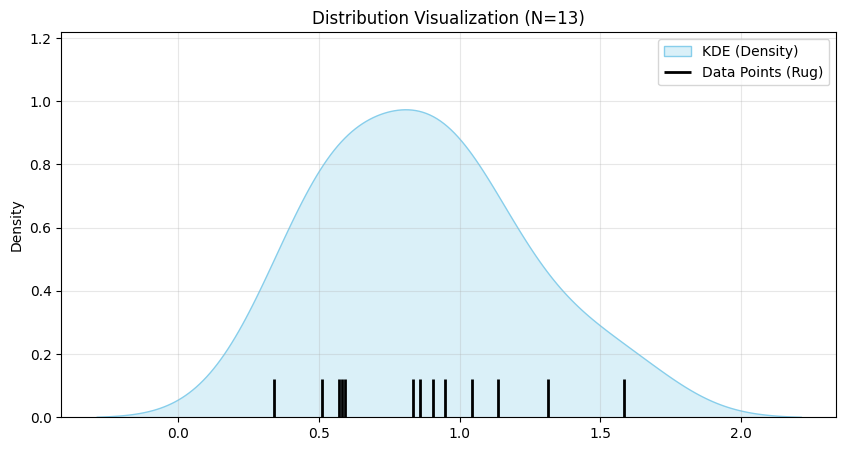

--- [1] Sarle's Bimodality Coefficient ---
값: 0.4822
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 12.6127
2개 분포 가정 (Bimodal) : 16.6987
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2021Q4


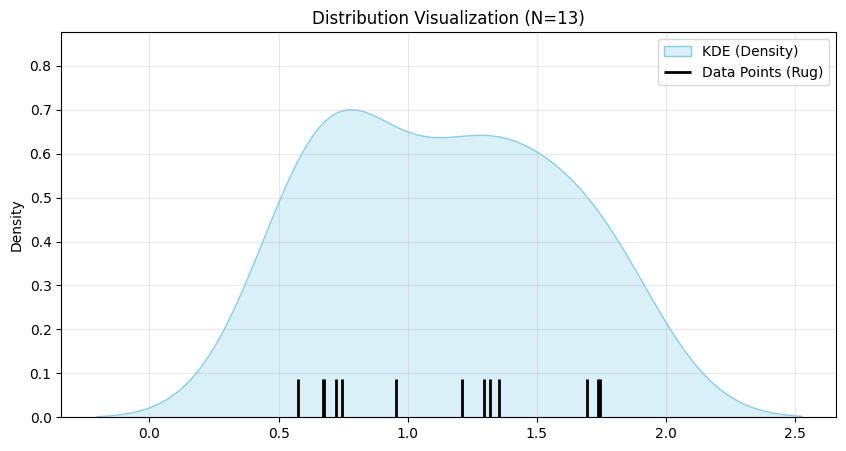

--- [1] Sarle's Bimodality Coefficient ---
값: 0.6529
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 18.1222
2개 분포 가정 (Bimodal) : 14.6427
결론: 이중 분포(Bimodal) 모델이 더 적합함
2022Q1


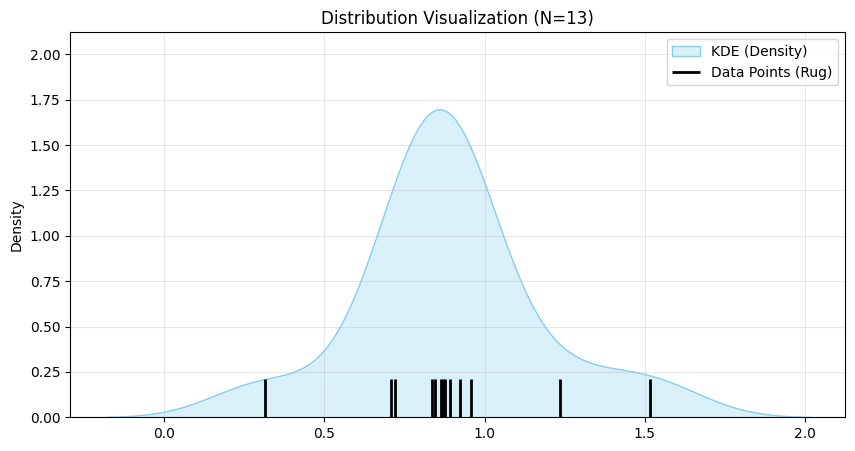

--- [1] Sarle's Bimodality Coefficient ---
값: 0.2603
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 6.4460
2개 분포 가정 (Bimodal) : 2.3457
결론: 이중 분포(Bimodal) 모델이 더 적합함
2022Q2


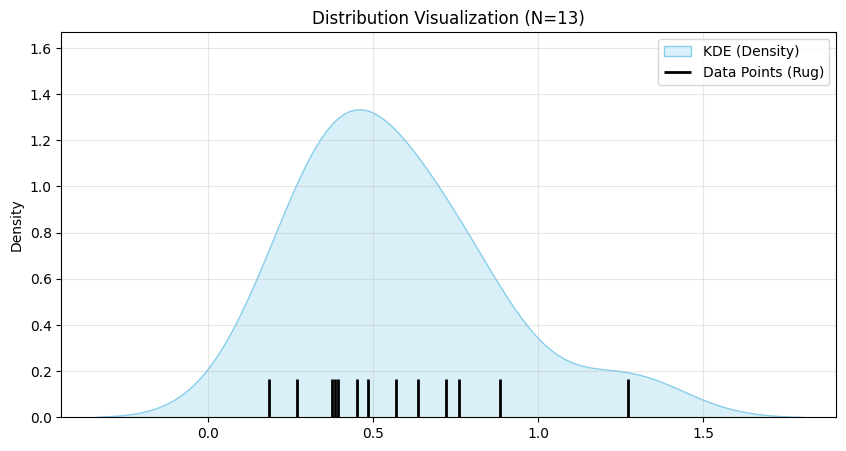

--- [1] Sarle's Bimodality Coefficient ---
값: 0.5556
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 7.7972
2개 분포 가정 (Bimodal) : 11.2070
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2022Q3


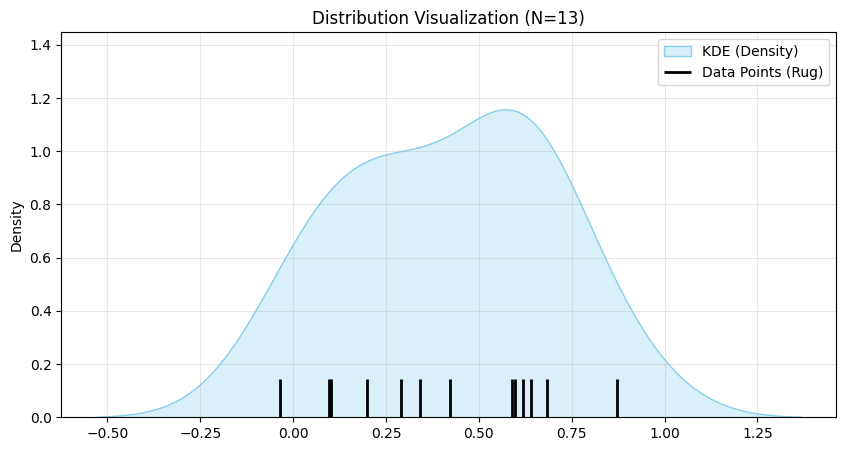

--- [1] Sarle's Bimodality Coefficient ---
값: 0.5378
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 6.2999
2개 분포 가정 (Bimodal) : 9.4402
결론: 단봉 분포(Unimodal) 모델이 더 적합함
2022Q4


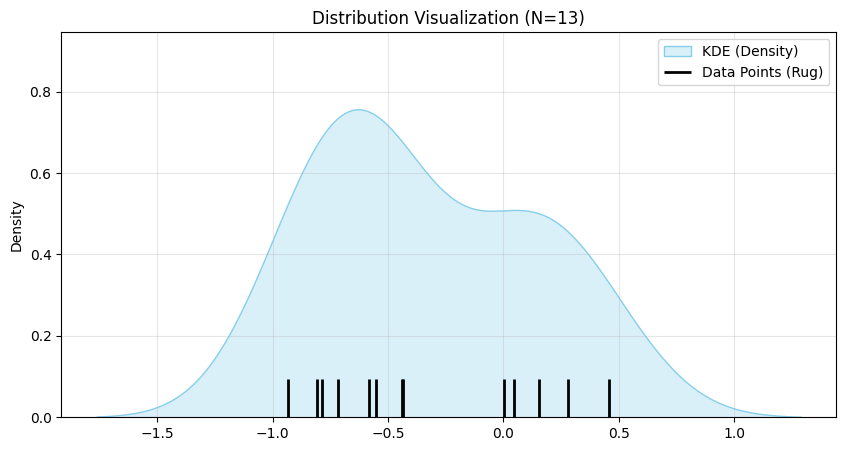

--- [1] Sarle's Bimodality Coefficient ---
값: 0.6605
해석: 0.555 (5/9)보다 크면 이중/다중 분포일 가능성이 있음

--- [2] AIC 비교 (낮을수록 좋음) ---
1개 분포 가정 (Unimodal): 19.8036
2개 분포 가정 (Bimodal) : 17.9371
결론: 이중 분포(Bimodal) 모델이 더 적합함


In [84]:
for period in pd.period_range(start='2017Q1', end='2022Q4', freq='Q'):
    print(period)
    data = results.loc[period].to_numpy()
    isBimodal(data)

In [79]:
results_all = pd.read_excel('all_results.xlsx', index_col=0)
results_all.index = pd.PeriodIndex(results_all.index, freq='Q')

In [118]:
def plotBimodal(data, true_gdp, med, mean, dqs, bw_adjust=0.9):
    # ---------------------------------------------------------
    # 2. 시각화 (KDE Plot + Rug Plot)
    # ---------------------------------------------------------
    plt.figure(figsize=(10, 5))

    # KDE(커널 밀도 추정): 히스토그램보다 부드러운 곡선으로 분포 표현
    sns.kdeplot(data, bw_method='scott', bw_adjust=bw_adjust, fill=True, color='skyblue', alpha=0.3, label='KDE (Density)')

    # Rug Plot: 실제 데이터 포인트의 위치를 바닥에 표시 (데이터가 적을 때 매우 유용)
    ax = sns.rugplot(data, color='black', height=0.1, linewidth=2, label='Base Models')

    ax.axvline(x=true_gdp, ymax=0.2, color='red', linestyle='-', linewidth=2)
    ax.text(x=true_gdp, y=0.2, s='Released\nGDP', c='red', horizontalalignment='center')

    ax.axvline(x=med, ymax=0.2, color='green', linestyle='-', linewidth=2)
    ax.text(x=med, y=0.2, s='Med', c='green', horizontalalignment='right')

    ax.axvline(x=mean, ymax=0.2, color='orange', linestyle='-', linewidth=2)
    ax.text(x=mean, y=0.2, s='Mean', c='orange', horizontalalignment='left')

    ax.axvline(x=dqs, ymax=0.2, color='blue', linestyle='-', linewidth=2)
    ax.text(x=dqs, y=0.2, s='DQS', c='blue', horizontalalignment='left')

    plt.title(f'Distribution Visualization')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


2017Q1


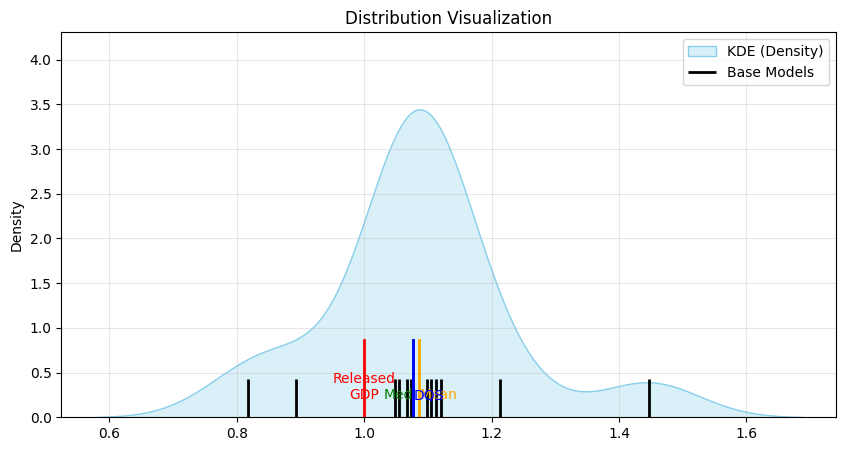

2017Q2


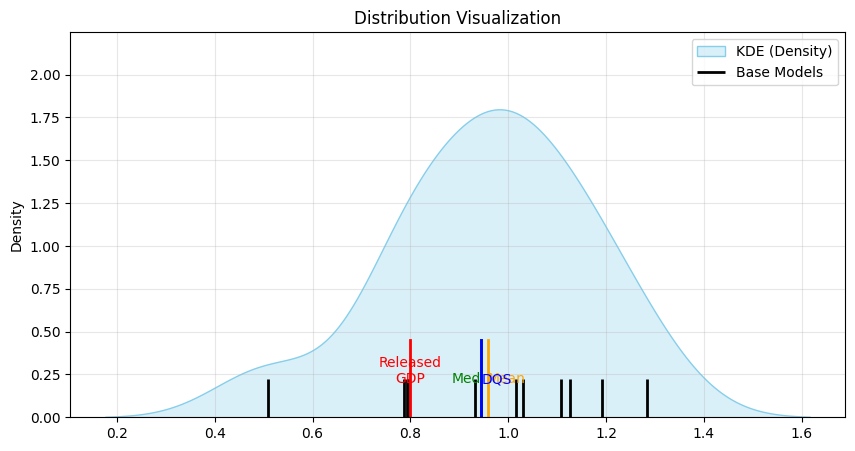

2017Q3


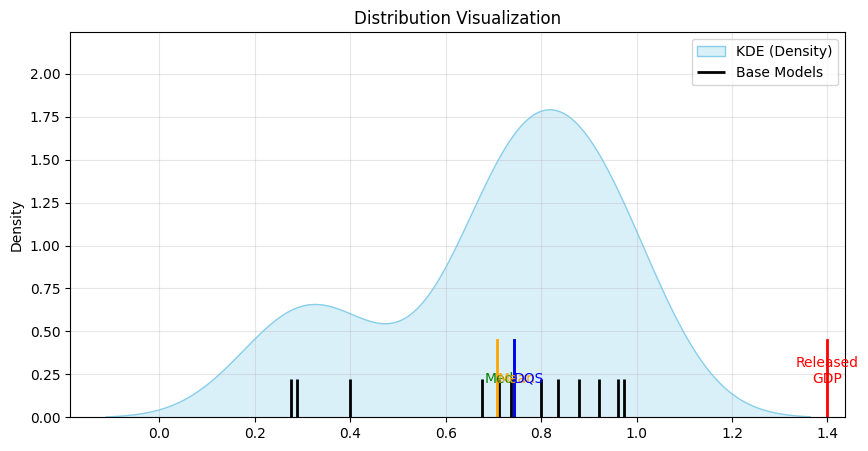

2017Q4


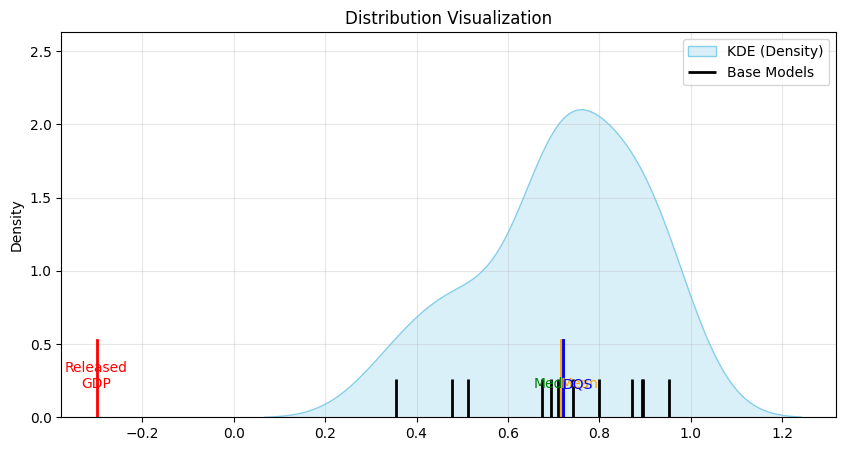

2018Q1


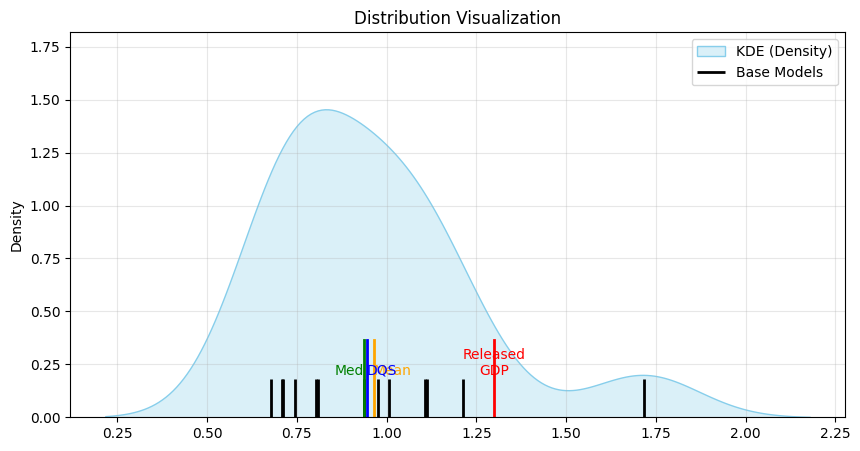

2018Q2


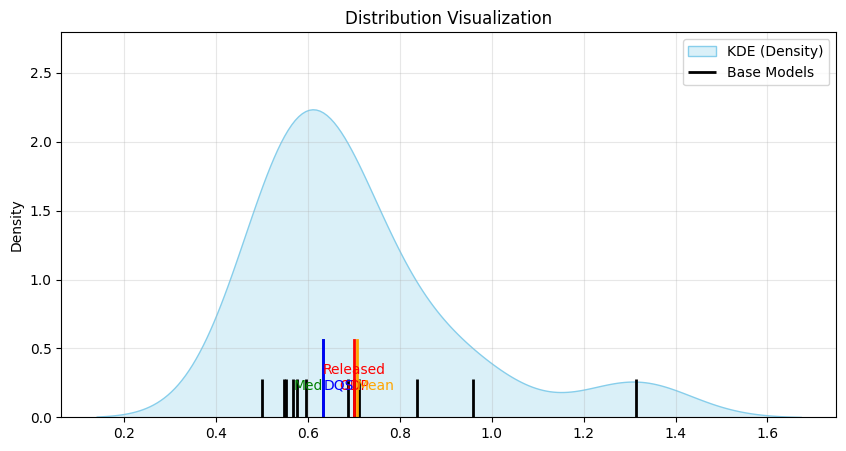

2018Q3


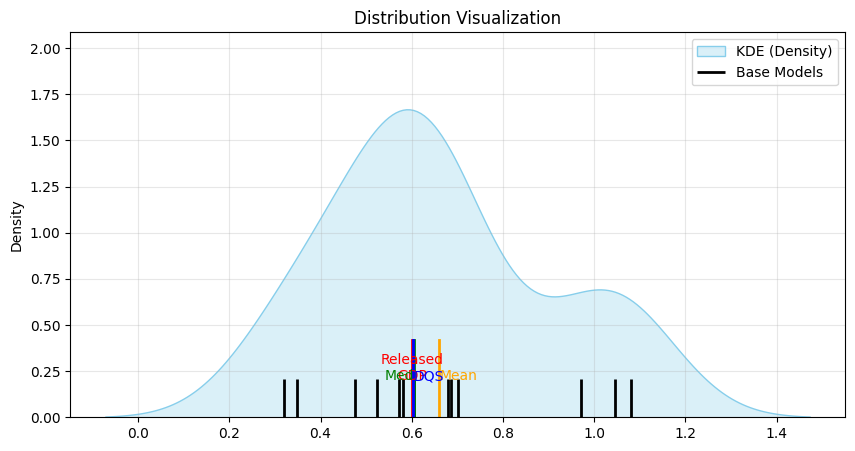

2018Q4


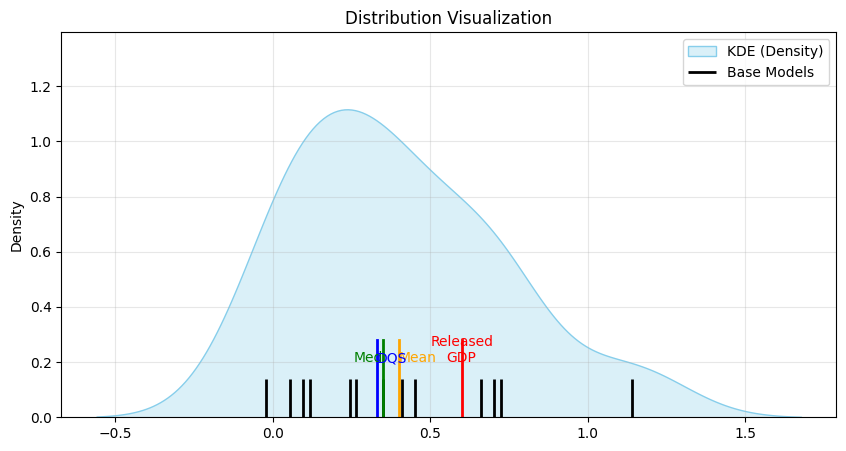

2019Q1


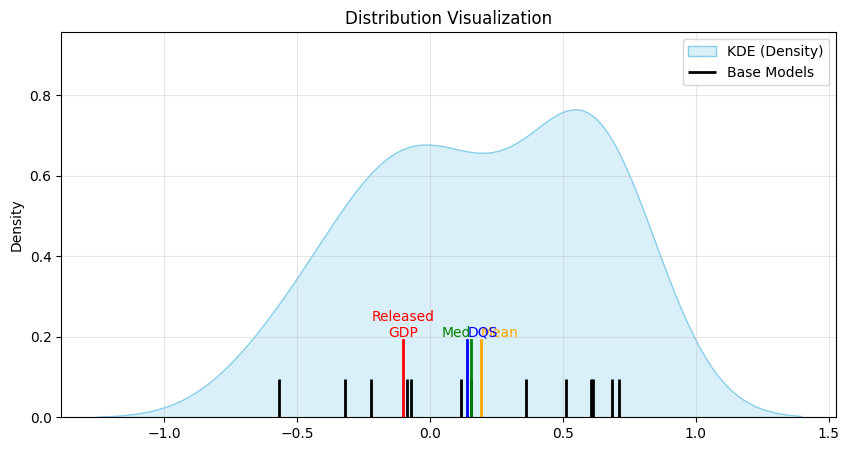

2019Q2


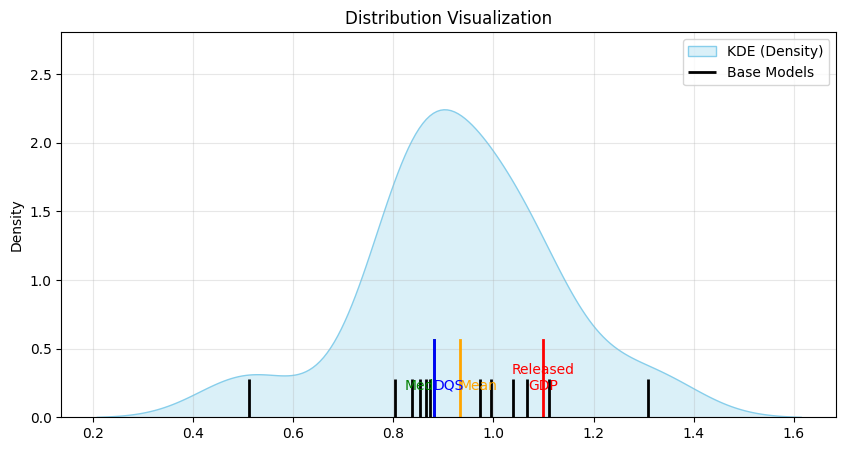

2019Q3


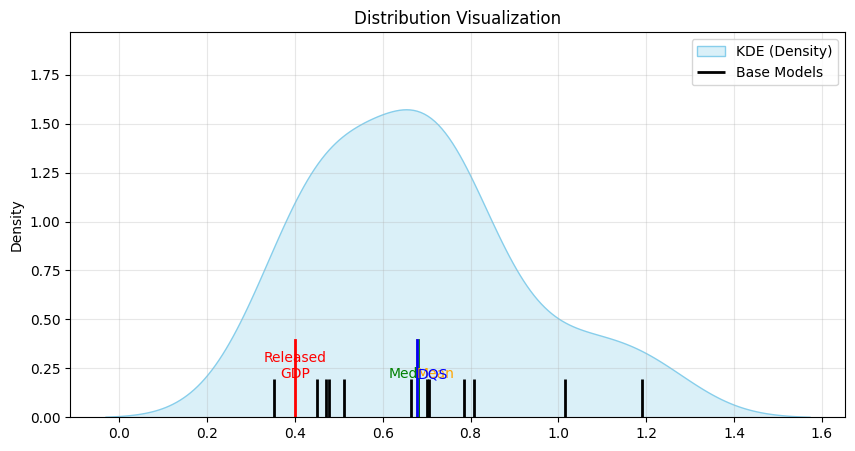

2019Q4


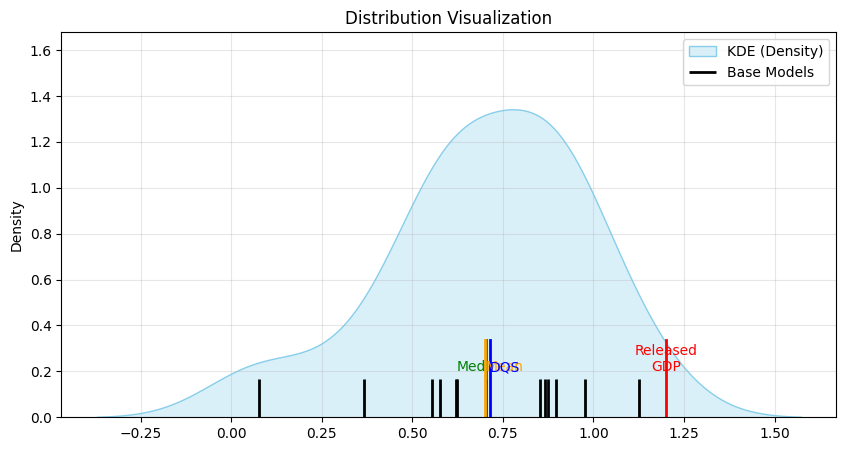

2020Q1


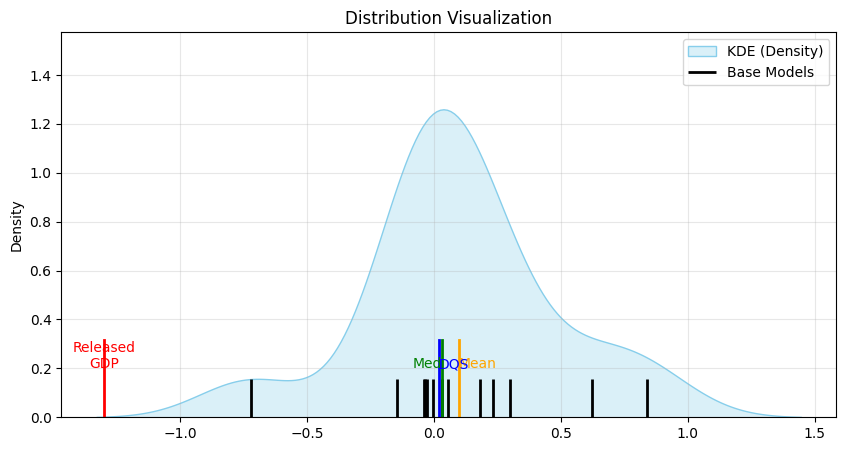

2020Q2


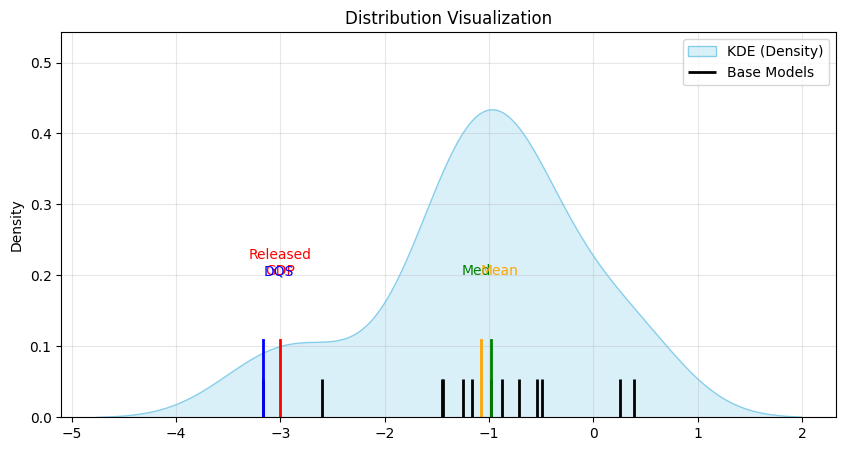

2020Q3


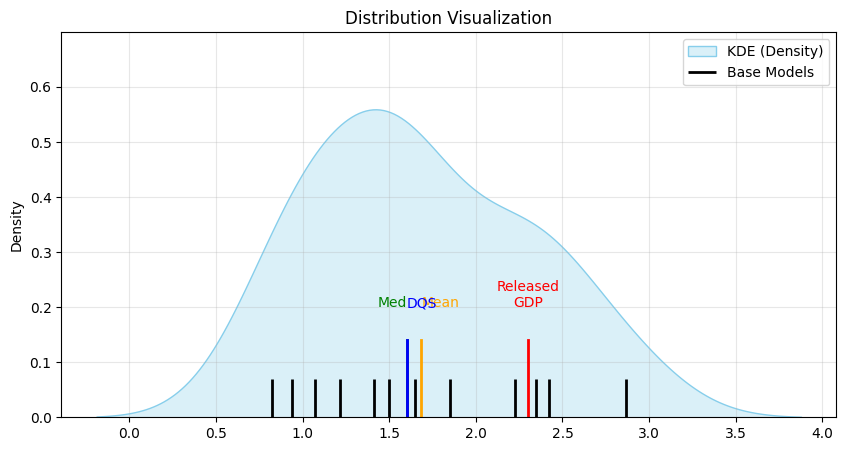

2020Q4


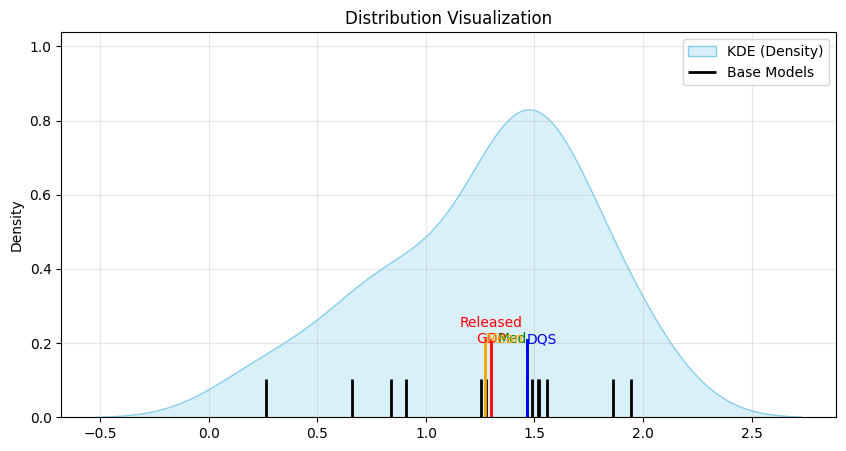

2021Q1


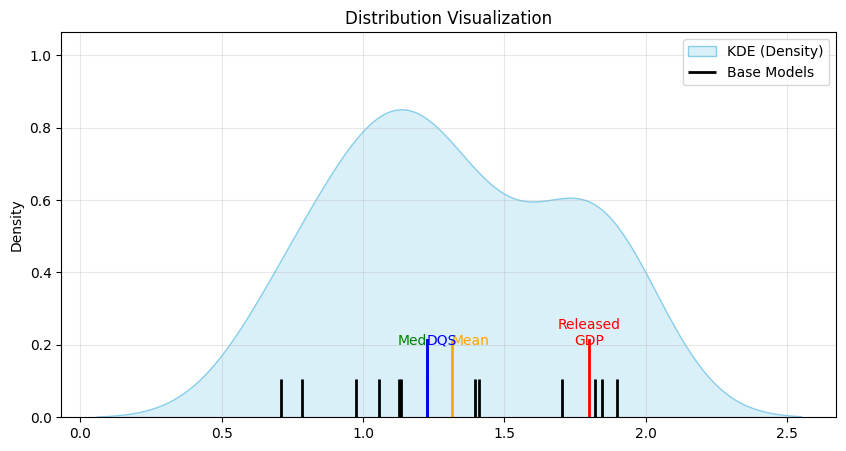

2021Q2


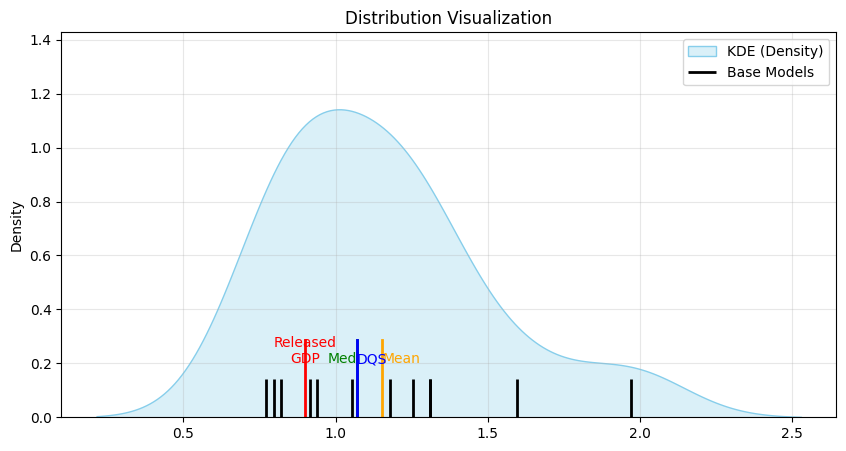

2021Q3


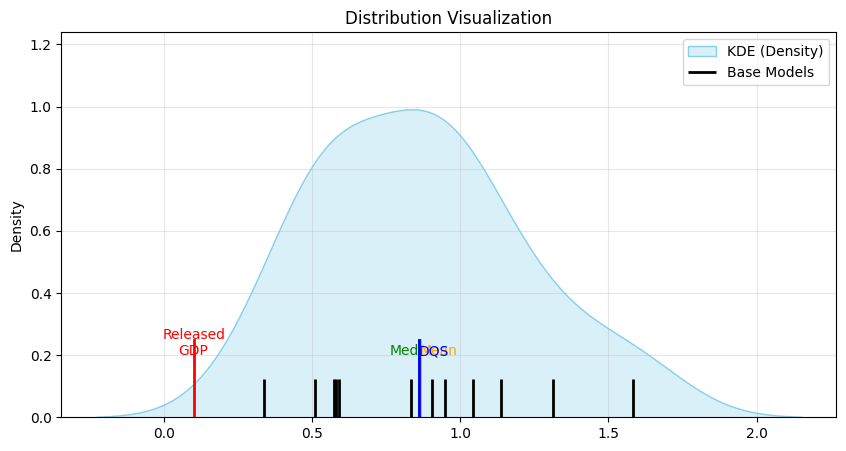

2021Q4


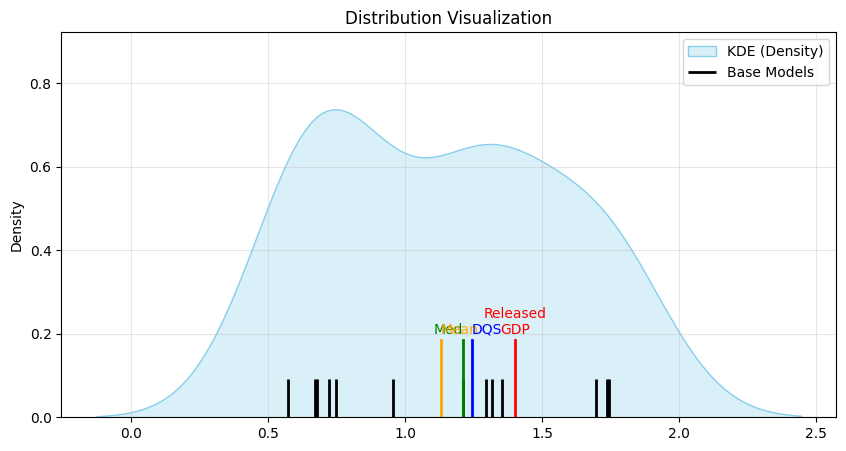

2022Q1


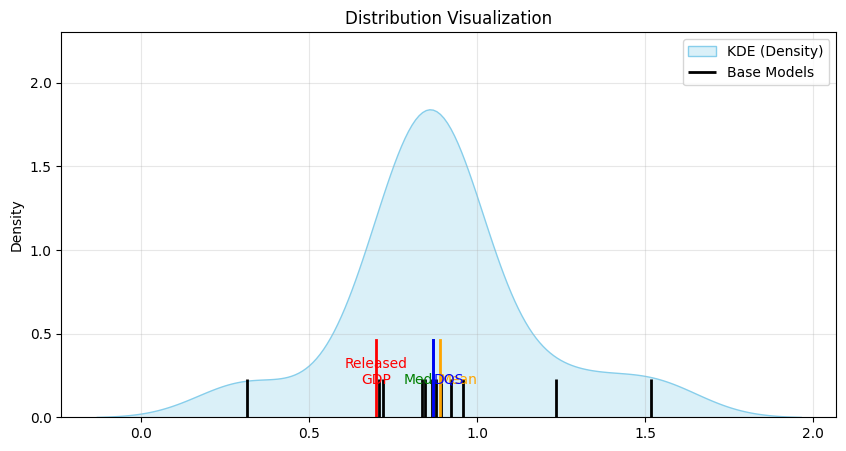

2022Q2


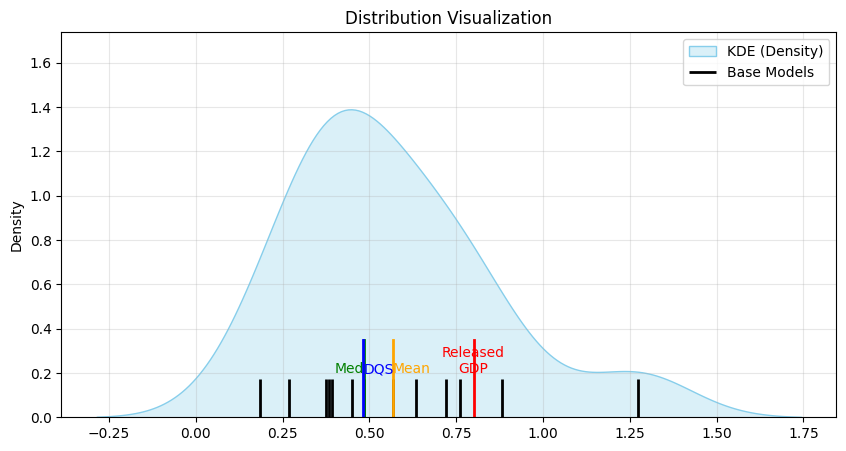

2022Q3


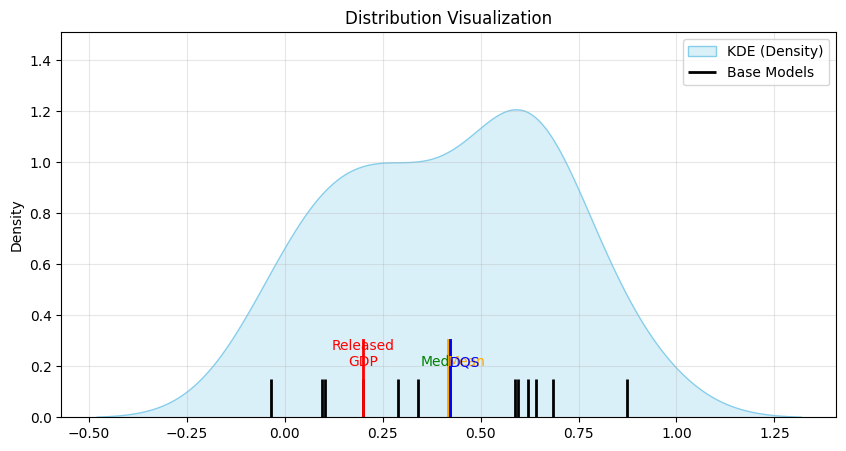

2022Q4


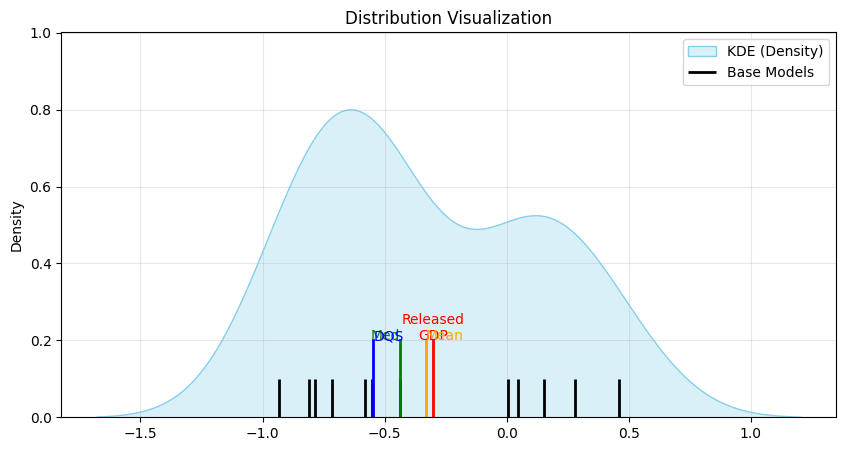

In [119]:
for target_period in pd.period_range(start='2017Q1', end='2022Q4', freq='Q'):
    print(target_period)
    data = results.loc[target_period].to_numpy()
    true_gdp = results_all.loc[target_period, 'GDP(SA) True']
    med = results_all.loc[target_period, 'Med']
    mean = results_all.loc[target_period, 'Avg']
    dqs = results_all.loc[target_period, 'DQS']
    plotBimodal(data=data, true_gdp=true_gdp, med=med, mean=mean, dqs=dqs)
    

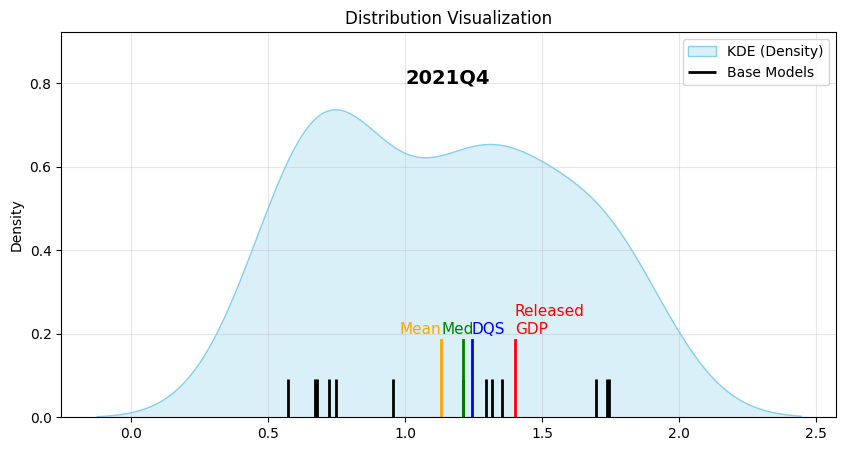

In [129]:
target_period = '2021Q4'
data = results.loc[target_period].to_numpy()
true_gdp = results_all.loc[target_period, 'GDP(SA) True']
med = results_all.loc[target_period, 'Med']
mean = results_all.loc[target_period, 'Avg']
dqs = results_all.loc[target_period, 'DQS']
# ---------------------------------------------------------
# 2. 시각화 (KDE Plot + Rug Plot)
# ---------------------------------------------------------
plt.figure(figsize=(10, 5))

# KDE(커널 밀도 추정): 히스토그램보다 부드러운 곡선으로 분포 표현
sns.kdeplot(data, bw_method='scott', bw_adjust=0.9, fill=True, color='skyblue', alpha=0.3, label='KDE (Density)')

# Rug Plot: 실제 데이터 포인트의 위치를 바닥에 표시 (데이터가 적을 때 매우 유용)
ax = sns.rugplot(data, color='black', height=0.1, linewidth=2, label='Base Models')

ax.axvline(x=true_gdp, ymax=0.2, color='red', linestyle='-', linewidth=2)
ax.text(x=true_gdp, y=0.2, s='Released\nGDP', c='red', horizontalalignment='left', fontdict={'fontsize':11})

ax.axvline(x=med, ymax=0.2, color='green', linestyle='-', linewidth=2)
ax.text(x=med+0.04, y=0.2, s='Med', c='green', horizontalalignment='right', fontdict={'fontsize':11})

ax.axvline(x=mean, ymax=0.2, color='orange', linestyle='-', linewidth=2)
ax.text(x=mean, y=0.2, s='Mean', c='orange', horizontalalignment='right', fontdict={'fontsize':11})

ax.axvline(x=dqs, ymax=0.2, color='blue', linestyle='-', linewidth=2)
ax.text(x=dqs, y=0.2, s='DQS', c='blue', horizontalalignment='left', fontdict={'fontsize':11})

plt.text(x=1, y=0.8, s=f"{target_period}", fontdict={'fontsize':14,'fontweight': 'bold',})
plt.title(f'Distribution Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig(f'fig_bimodal_{target_period}.png', dpi=300)
plt.show()

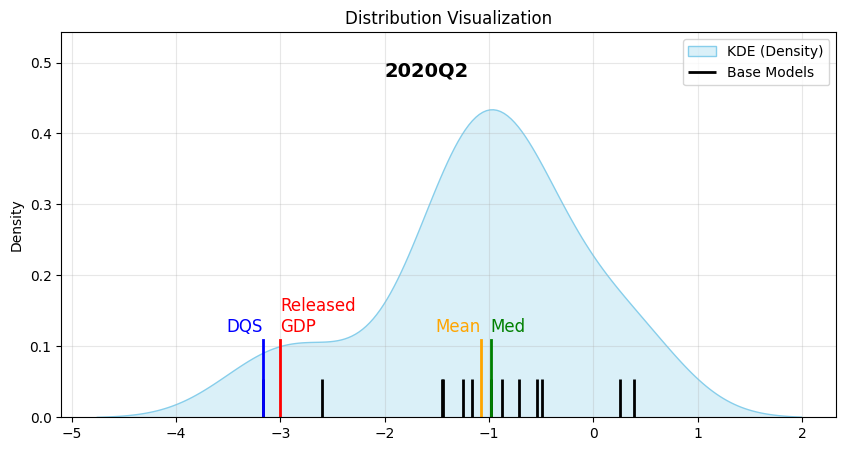

In [130]:
target_period = '2020Q2'
data = results.loc[target_period].to_numpy()
true_gdp = results_all.loc[target_period, 'GDP(SA) True']
med = results_all.loc[target_period, 'Med']
mean = results_all.loc[target_period, 'Avg']
dqs = results_all.loc[target_period, 'DQS']
# ---------------------------------------------------------
# 2. 시각화 (KDE Plot + Rug Plot)
# ---------------------------------------------------------
plt.figure(figsize=(10, 5))

# KDE(커널 밀도 추정): 히스토그램보다 부드러운 곡선으로 분포 표현
sns.kdeplot(data, bw_method='scott', bw_adjust=0.9, fill=True, color='skyblue', alpha=0.3, label='KDE (Density)')

# Rug Plot: 실제 데이터 포인트의 위치를 바닥에 표시 (데이터가 적을 때 매우 유용)
ax = sns.rugplot(data, color='black', height=0.1, linewidth=2, label='Base Models')

ax.axvline(x=true_gdp, ymax=0.2, color='red', linestyle='-', linewidth=2)
ax.text(x=true_gdp, y=0.12, s='Released\nGDP', c='red', horizontalalignment='left', fontdict={'fontsize':12})

ax.axvline(x=med, ymax=0.2, color='green', linestyle='-', linewidth=2)
ax.text(x=med, y=0.12, s='Med', c='green', horizontalalignment='left', fontdict={'fontsize':12})

ax.axvline(x=mean, ymax=0.2, color='orange', linestyle='-', linewidth=2)
ax.text(x=mean, y=0.12, s='Mean', c='orange', horizontalalignment='right', fontdict={'fontsize':12})

ax.axvline(x=dqs, ymax=0.2, color='blue', linestyle='-', linewidth=2)
ax.text(x=dqs, y=0.12, s='DQS', c='blue', horizontalalignment='right', fontdict={'fontsize':12})

plt.text(x=-2, y=0.48, s=f"{target_period}", fontdict={'fontsize':14,'fontweight': 'bold',})
plt.title(f'Distribution Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig(f'fig_bimodal_{target_period}.png', dpi=300)
plt.show()